Female genital mutilation (FGM) and rape are both forms of violence against women and girls, and identifying vulnerable populations is an important step towards preventing these harmful practices. Here are some populations that may be particularly vulnerable to FGM and rape:

Girls and women in communities where FGM is a traditional practice: FGM is a deeply ingrained cultural practice in some communities, and girls and women in these communities are often at risk of undergoing FGM.

Girls and women in poverty: Poverty can increase the risk of FGM and rape, as girls and women in impoverished communities may be more likely to be forced into early marriage or transactional sex in order to survive.

Girls and women in conflict zones: Women and girls in conflict zones are at a heightened risk of rape and other forms of sexual violence.

Migrants and refugees: Migrants and refugees are often at a higher risk of FGM and rape due to their displacement and lack of social support networks.

LGBTQ+ individuals: LGBTQ+ individuals may face increased risk of rape and FGM due to discrimination and societal stigmatization.

#  Import necessary libraries

In [1]:



import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#### reading the data file and displaying the top five rows

In [2]:
data = pd.read_csv('data.csv')
data.head()

,age,gender,education,income,location,poverty,low_education,cultural_beliefs,exposure_to_violence,other_risk_factors,outcome
0,57,Female,Secondary,"Less than 10,000",Rural,0,0,0,0,0,0
1,42,Female,Secondary,"More than 100,000",Urban,1,0,0,1,1,1
2,27,Non-binary,Primary,"50,000 - 100,000",Urban,1,0,1,0,1,0
3,25,Non-binary,University,"10,000 - 50,000",Urban,1,0,0,1,0,1
4,52,Male,University,"Less than 10,000",Rural,1,0,1,1,1,0


# Exploratory data analysis

#### print first five rows of data

##### print summary statistics of data

##### check for missing values

In [3]:

data.head()  
data.describe()  
data.isnull().sum()  



age                     0
gender                  0
education               0
income                  0
location                0
poverty                 0
low_education           0
cultural_beliefs        0
exposure_to_violence    0
other_risk_factors      0
outcome                 0
dtype: int64

##### Encoding the categorical data types

In [4]:
data["income"] = data["income"].astype('category').cat.codes
data['gender'] = data['gender'].astype('category').cat.codes
data['location'] = data['location'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data.dtypes

age                     int64
gender                   int8
education                int8
income                   int8
location                 int8
poverty                 int64
low_education           int64
cultural_beliefs        int64
exposure_to_violence    int64
other_risk_factors      int64
outcome                 int64
dtype: object

#####  visualizing the target and exploring the relationships of the variables


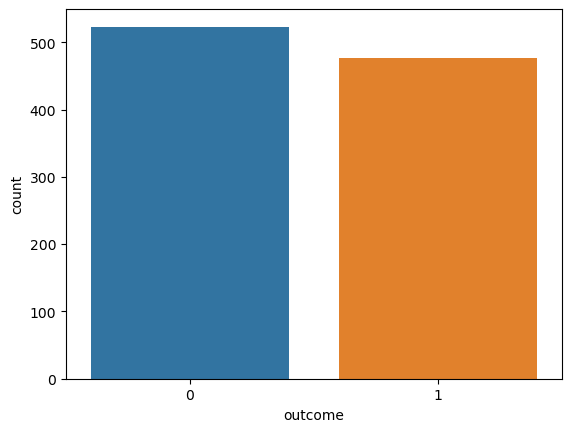

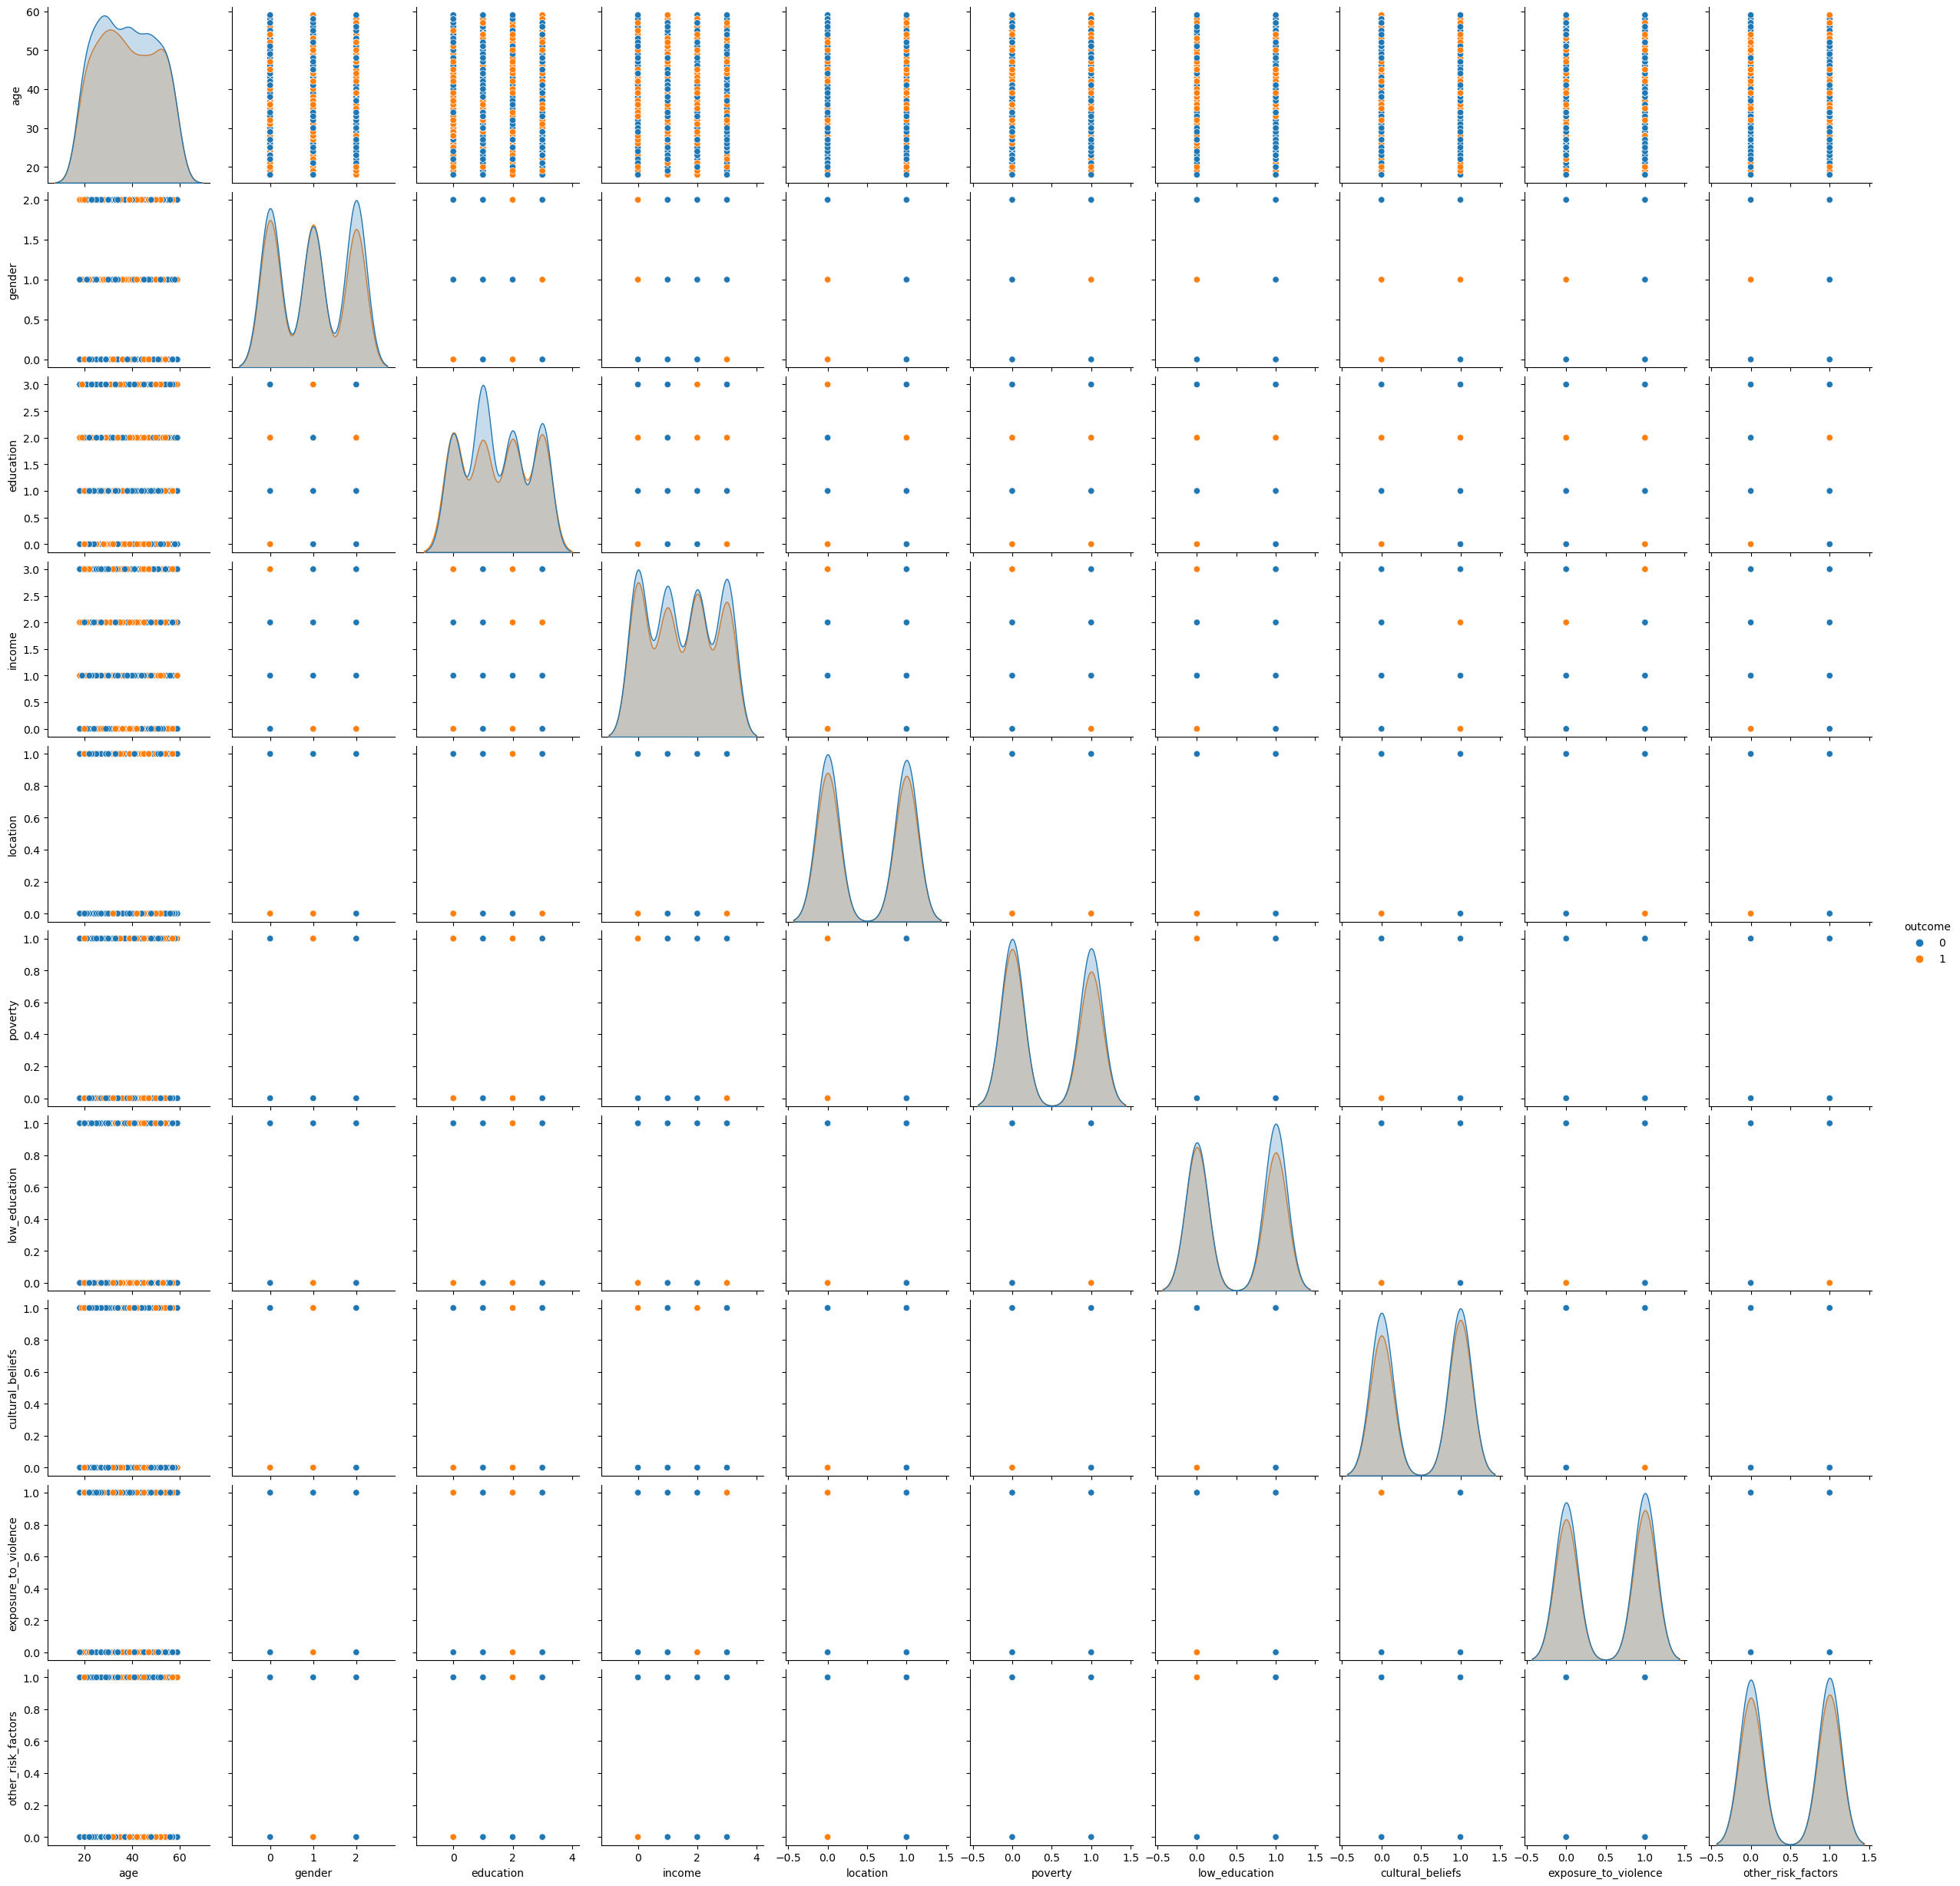

In [5]:
sns.countplot(x='outcome', data=data)  # visualize the distribution of outcome variable
sns.pairplot(data, hue='outcome')  # visualize the pairwise relationships between variables

### Split the data into training and testing sets

Creating the independent variable as X and depedent varaible as Y

In [6]:

X = data.drop('outcome', axis=1)  # independent variables
y = data['outcome']  # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # split data into training and testing sets

# Build a random forest classification model

In [7]:

rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # initialize random forest classifier
rfc.fit(X_train, y_train)  # fit the model to the training data
y_pred = rfc.predict(X_test)  # make predictions on the testing data

In [8]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))  # print the accuracy of the model
print(classification_report(y_test, y_pred))  # print the classification report of the model

Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.52      0.42      0.46       109
           1       0.43      0.53      0.48        91

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.47       200



### Using Linear regression model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Fit the model

In [10]:


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set

In [11]:

y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R-squared:', r2)


RMSE: 0.5149780612110024
R-squared: -0.06947234006913172


In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set

In [13]:
model1 = SVR(kernel='linear')
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R-squared:', r2)

RMSE: 0.6968945006760847
R-squared: -0.9585117252649238


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.45


In [16]:
# save the model to disk
import joblib
filename = 'rf_model.sav'
joblib.dump(model1, filename )

['rf_model.sav']